# Data Preprocessing (Basic)

### Data Overview
 - Data is contained in train.csv
 - Train.csv contains 6 columns: 
         - id 
         - qid1 (Question ID 1)
         - qid2 (Question ID 2)
         - question1 (Question 1)
         - question2 (Question 2)
         - is_duplicate (0 or 1)
 - Number of samples: 4,04,290

## Exploratory Data Analysis

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [64]:
data = pd.read_csv("train.csv")
data.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [65]:
print(data.shape)

(404290, 6)


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [67]:
# Let's check an example of each similar question pair and a dissimilar question pair

print("A disismilar question pair: ")
print("Question 1: ",data.iloc[0]['question1'])
print("Question 2: ",data.iloc[0]['question2'])

print("\nA similar pair: ")
print("Question 1: ",data.iloc[5]['question1'])
print("Question 2: ",data.iloc[5]['question2'])

A disismilar question pair: 
Question 1:  What is the step by step guide to invest in share market in india?
Question 2:  What is the step by step guide to invest in share market?

A similar pair: 
Question 1:  Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
Question 2:  I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?


Question pairs are not Similar (is_duplicate = 0): 63.08%
Question pairs are Similar (is_duplicate = 1): 36.92%


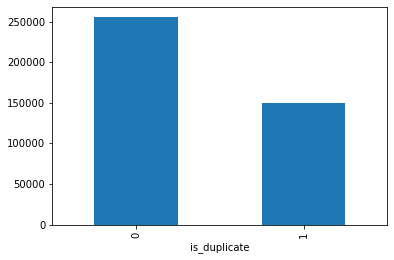

In [68]:
# Let's check the distribution of 0's and 1's in is_duplicate column

data.groupby("is_duplicate")["id"].count().plot.bar()

print(f"Question pairs are not Similar (is_duplicate = 0): {100 - round(data['is_duplicate'].mean()*100, 2)}%")
print(f"Question pairs are Similar (is_duplicate = 1): {round(data['is_duplicate'].mean()*100, 2)}%")

#### Observation: The data is not balanced, it is biased towards 0 i.e, We have mostly dissimilar pairs. So, we cannot measure our final preformance with accuracy as a metric.

In [69]:
# Let's check for total unique questions

unique_questions = len(np.unique(data['qid1'].tolist() + data['qid2'].tolist()))
print("Total unique question: ",unique_questions)

Total unique question:  537933


In [70]:
# Let's check total repeated questions

qids_series = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
repeated_questions = sum(qids_series.value_counts() > 1)
print("Total repeated questions (atleast once): ",repeated_questions)

Total repeated questions (atleast once):  111780


Text(0.5, 1.0, 'Unique Questions VS Repeated Questions')

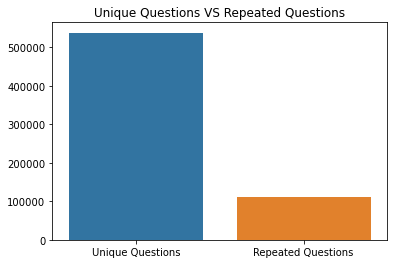

In [71]:
# Plotting the distributions

sns.barplot(x = ["Unique Questions", "Repeated Questions"], y = [unique_questions, repeated_questions])
plt.title("Unique Questions VS Repeated Questions")

#### Question occurences distribution

Maximum number of times a single question is repeated: 157



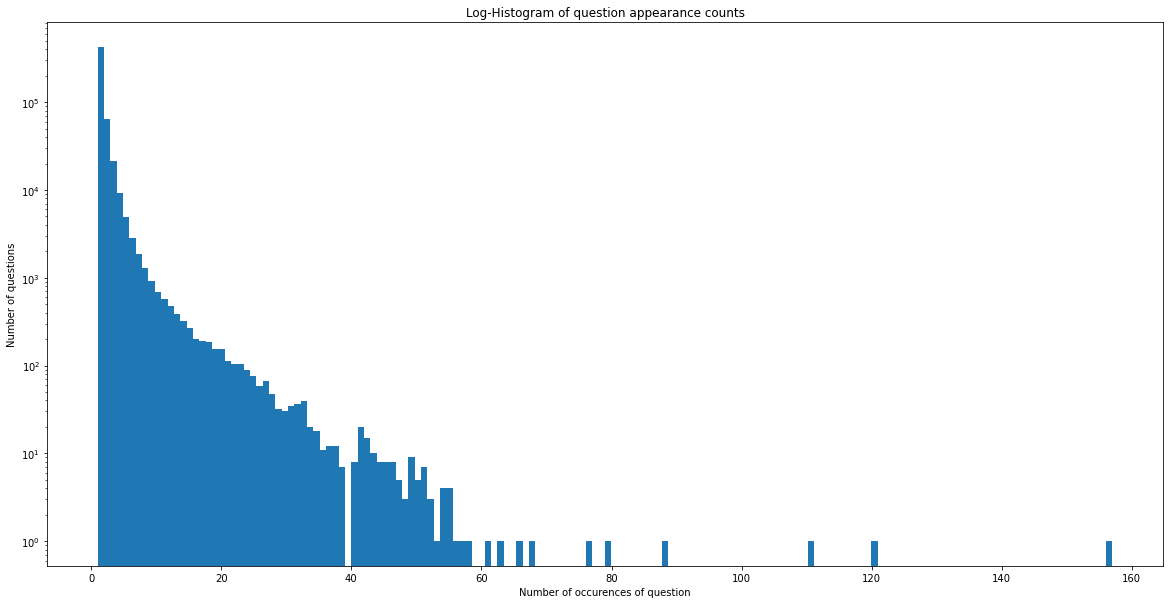

In [72]:
plt.figure(figsize=(20, 10))
plt.hist(qids_series.value_counts(), bins=160)
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids_series.value_counts()))) 

In [73]:
# Let's see if the dataset contains any null/NaN values
data[data.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [74]:
# Let's drop since thers are only 3 data points
data.dropna()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


### Feature Extraction (Part - I)

#### Let's extract some more features:
 - __freq_qid1__: Frequencies of qid1
 - __freq_qid2__: Frequencies of qid2
 - __q1_len__: Length of question 1
 - __q2_len__: Length of question 2
 - __q1_n_words__: Total words in question 1
 - __q2_n_words__: Total words in question 2
 - __common_words__: Total common words in question 1 and question 2
 - __total_words__: Total number of words in both questions
 - __words_ratio__: (common_words) / (total_words)
 - __freq1 + freq2__: Sum of frequencies of both the questions
 - __freq1 - freq2__: Absolute difference of frequency of both questions

In [75]:
data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count') 
data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count')
data['q1len'] = data['question1'].str.len() 
data['q2len'] = data['question2'].str.len()

In [76]:
data['q1_n_words'] = data['question1'].str.split().str.len()
data['q2_n_words'] = data['question2'].str.split().str.len()


In [85]:
def common_words(row):    
    w1 = set(map(lambda word: word.lower().strip(), str(row['question1']).split()))
    w2 = set(map(lambda word: word.lower().strip(), str(row['question2']).split()))    
    return 1.0 * len(w1 & w2)

data['Common_words'] = data.apply(lambda row: common_words(row), axis=1)

def set_of_all_words(row):
    w1 = set(map(lambda word: word.lower().strip(), str(row['question1']).split()))
    w2 = set(map(lambda word: word.lower().strip(), str(row['question2']).split()))    
    return 1.0 * (len(w1) + len(w2))

data['words_set'] = data.apply(set_of_all_words, axis=1)


data['word_share'] = data.apply(lambda row: row.Common_words / row.words_set, axis=1)

data['freq_q1+q2'] = data['freq_qid1']+data['freq_qid2']
data['freq_q1-q2'] = abs(data['freq_qid1']-data['freq_qid2'])

In [86]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,Common_words,words_set,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66.0,57.0,14.0,12.0,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51.0,88.0,8.0,13.0,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73.0,59.0,14.0,10.0,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50.0,65.0,11.0,9.0,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76.0,39.0,13.0,7.0,2.0,20.0,0.100000,4,2


**Analysis of extracted Features:**


In [87]:
print(f"Minimum words in question 1 : {min(data['q1_n_words'])}")
print(f"Minimum words in question 2 : {min(data['q2_n_words'])}")
print ("Number of Questions with minimum length [question1] :", data[data['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", data[data['q2_n_words']== 1].shape[0])
print(f"Minimum words in both questions combined : {min(data['words_set'])}")
print(f"Maximum common words in both questions : {max(data['Common_words'])}")

Minimum words in question 1 : 1.0
Minimum words in question 2 : 1.0
Number of Questions with minimum length [question1] : 69
Number of Questions with minimum length [question2] : 25
Minimum words in both questions combined : 2.0
Maximum common words in both questions : 41.0


**Word_share analysis :**

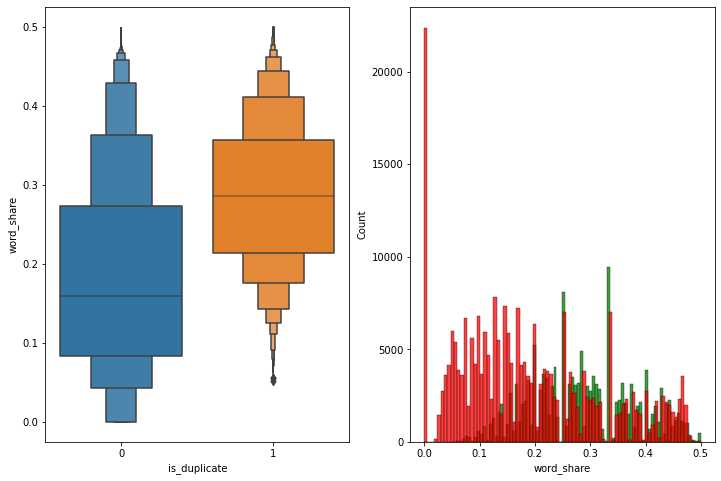

In [108]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxenplot(x = 'is_duplicate', y = 'word_share', data = data)

plt.subplot(1,2,2)
sns.histplot(data[data['is_duplicate'] == 1.0]['word_share'] , label = "1", color = 'green')
sns.histplot(data[data['is_duplicate'] == 0.0]['word_share'] , label = "0" , color = 'red' )
plt.show()

~ The distributions for word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity

~ The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

**Common_Words Analysis :**

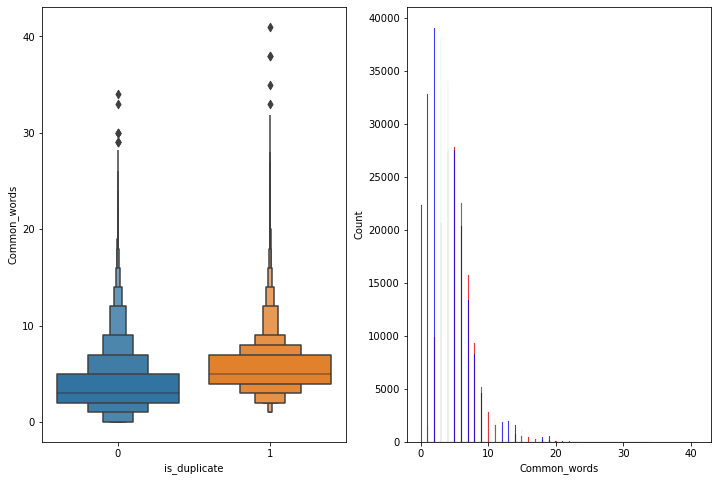

In [119]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxenplot(x = 'is_duplicate', y = 'Common_words', data = data)

plt.subplot(1,2,2)
sns.histplot(data[data['is_duplicate'] == 1.0]['Common_words'] , label = "1", color = 'red')
sns.histplot(data[data['is_duplicate'] == 0.0]['Common_words'] , label = "0" , color = 'blue' )
plt.show()

The distributions of the Common_words feature in similar and non-similar questions are highly overlapping